In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import numpy as np

In [15]:
faces=fetch_lfw_people(min_faces_per_person=100)

In [16]:
faces.data.shape

(109, 2914)

In [17]:
faces.images.shape

(109, 62, 47)

In [21]:
X=faces.data
pca=PCA(109)
X_dr=pca.fit_transform(X)
X_dr.shape

(109, 109)

In [31]:
X_inverse=pca.inverse_transform(X_dr)
X_inverse.shape

(109, 2914)

array([82.66683 , 66.999954, 58.99998 , ..., 94.00004 , 93.66672 ,
       94.66677 ], dtype=float32)

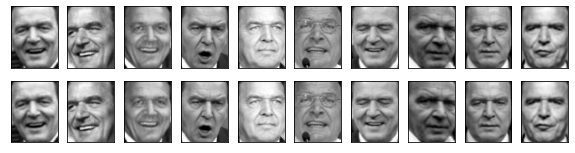

In [45]:
#降维不是完全可逆的
fig,ax=plt.subplots(2,10,figsize=(10,2.5)
                           ,subplot_kw={"xticks":[],"yticks":[]}
                   )
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

In [46]:
from sklearn.datasets import load_digits

In [47]:
digits=load_digits()

In [49]:
digits.data.shape

(1797, 64)

In [51]:
digits.images.shape

(1797, 8, 8)

In [59]:
#定义画图函数
def plot_digits(data):
    fig,axes=plt.subplots(4,10,figsize=(10,4)
                                ,subplot_kw={"xticks":[],"yticks":[]}
                        )
    for i , ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")


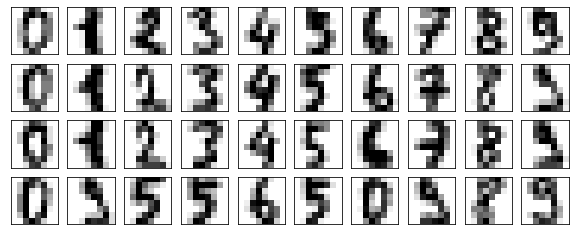

In [60]:
plot_digits(digits.data)

In [61]:
noisy=np.random.normal(digits.data,2)

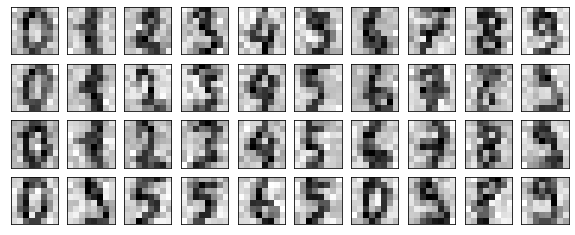

In [62]:
plot_digits(noisy)

In [64]:
#降维
pca=PCA(0.5).fit(noisy)
X_dr=pca.transform(noisy)
X_dr.shape

(1797, 6)

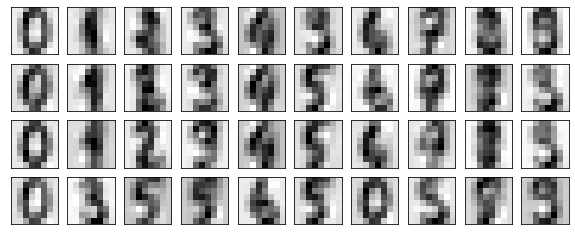

In [65]:
#逆转降维结果，实现降噪
without_noisy=pca.inverse_transform(X_dr)
plot_digits(without_noisy)

In [66]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


In [69]:
data=pd.read_csv(r"/Users/lijianwei/Desktop/菜菜sklearn/day08_digit recognizor.csv")

In [76]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [77]:
pca_line=PCA().fit(x)

In [79]:
pca_line.explained_variance_.shape

(784,)

In [80]:
x.shape

(42000, 784)

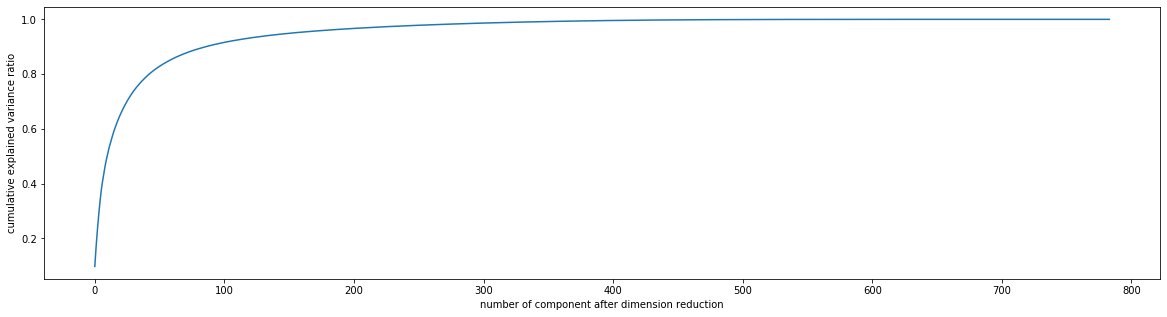

In [82]:
#画累计方差贡献率曲线，找到最佳降维后的维度范围
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of component after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

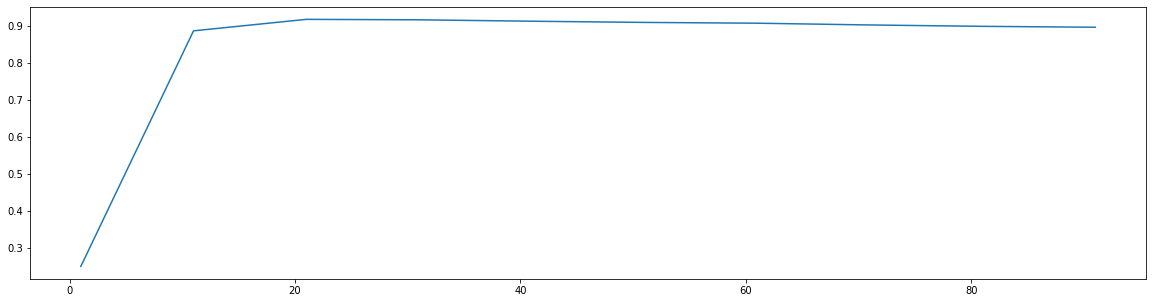

In [83]:
score=[]
for i in range(1,101,10):
    x_dr=PCA(i).fit_transform(x)
    once=cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0)
                                    ,x_dr,y,cv=5
                            ).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

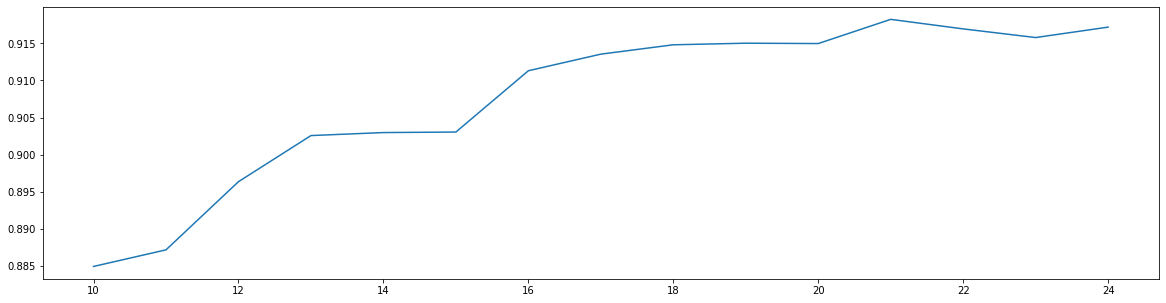

In [84]:
score=[]
for i in range(10,25):
    x_dr=PCA(i).fit_transform(x)
    once=cross_val_score(RandomForestClassifier(n_estimators=10,random_state=0)
                                    ,x_dr,y,cv=5
                            ).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [85]:
X_dr=PCA(21).fit_transform(x)

In [86]:
cross_val_score(RandomForestClassifier(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9437145626284412

In [87]:
from sklearn.neighbors import KNeighborsClassifier as KNN
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9676186937272954

scores=[]
for i in range(10):
    once=cross_val_score(KNN(i),X_dr,y,cv=).mean()
    scores.append(once)
plt.figure()
plt.plot(range(10),scores)
plt.show()

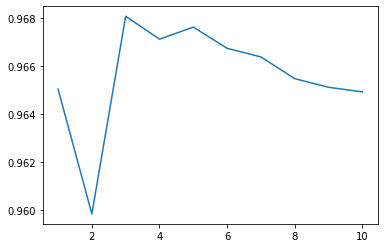

In [93]:
scores=[]
for i in range(1,11):
    once=cross_val_score(KNN(i),X_dr,y,cv=5).mean()
    scores.append(once)
plt.figure()
plt.plot(range(1,11),scores)
plt.show()

In [94]:
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

0.9680708762453479

In [1]:
python this

SyntaxError: invalid syntax (<ipython-input-1-b852521b23e1>, line 1)

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
